In [1]:
import bifacialvf
import pandas as pd
from pathlib import Path
from bifacialvf import *
import matplotlib.pyplot as plt
import seaborn as sns

Path.ls = lambda x: sorted(list(x.iterdir()))

In [2]:
PATH = Path('../bifacialvf/data')
PATH.ls()

[PosixPath('../bifacialvf/data/722740TYA.CSV'),
 PosixPath('../bifacialvf/data/724010TYA.CSV'),
 PosixPath('../bifacialvf/data/724666TYA.CSV'),
 PosixPath('../bifacialvf/data/Output'),
 PosixPath('../bifacialvf/data/USA_VA_Richmond.Intl.AP.724010_TMY.epw'),
 PosixPath('../bifacialvf/data/tmy_ines.csv')]

In [3]:
slope = 1.69 * 2
beta = 30                   # PV tilt (deg)
sazm = 180                  # PV Azimuth(deg)
C = 0.77/slope               # GroundClearance(panel slope lengths)
rtr = 9.4/slope          # row to row spacing in panel lengths. 

writefiletitle = "output.csv"

# Set optional variables.  These are the default values
rowType = "first"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
cellRows = 7                # CellRows(# hor rows in panel)   This is the number of irradiance values returned along module chord
PVfrontSurface = "ARglass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "ARglass"     # PVbackSurface(glass or ARglass)
albedo = 0.4               # ground albedo beneath system
# 1-axis tracking instructions (optional)
tracking=False
backtrack=False       # backtracking optimization as defined in pvlib

In [4]:
tmy_file = PATH/'tmy_ines.csv'
gps_data = {'Name':'Chambery', 'latitude': 45.637001, 'longitude': 5.881, 'Elevation': 235.0, 'TZ':2}

In [5]:
tmy3 = pd.read_csv(tmy_file, index_col='date', parse_dates=True)

In [6]:
tmy3.head()

,DNI,DHI,DryBulb,Wspd
date,,,,
2017-01-01 07:00:00,0.0,0.00,-2.19,0.935
2017-01-01 08:00:00,0.0,28.43,-1.98,0.955
2017-01-01 09:00:00,0.0,60.17,-1.80,1.345
2017-01-01 10:00:00,0.0,93.09,-1.47,1.065
2017-01-01 11:00:00,0.0,120.62,-1.10,0.925


In [7]:
bifacialvf.simulate_inner(tmy3, gps_data, writefiletitle, beta, sazm, 
                C=C, rtr=rtr, rowType=rowType, transFactor=transFactor, cellRows=cellRows,
                PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, albedo=albedo, 
                tracking=tracking, backtrack=backtrack, sam_header=False)

  0%|          | 0/4159 [00:00<?, ?it/s]/home/tc256760/Apps/bifacialvf/bifacialvf/vf.py:640: RuntimeWarning: divide by zero encountered in double_scalars
  projectedX1 = PcellX - np.float64(PcellY) / math.tan(startElvDown);      # Projection of ElvDown to ground in -x direction
  1%|          | 25/4159 [00:00<00:16, 247.90it/s]

 
********* 
Running Simulation for TMY3:  Chambery
Location:   Chambery
Lat:  45.637001  Long:  5.881  Tz  2
Parameters: beta:  30   Sazm:  180   Height:  0.227810650887574   rtr separation:  2.7810650887573964   Row type:  first   Albedo:  0.4
Saving into output.csv
 
 


100%|██████████| 4159/4159 [00:18<00:00, 220.83it/s]

Finished


In [8]:
res = pd.read_csv(writefiletitle, header=2, index_col='date', parse_dates=True)
res.head().T

date,2017-01-01 10:00:00,2017-01-01 11:00:00,2017-01-01 12:00:00,2017-01-01 13:00:00,2017-01-01 14:00:00
DNI,0.000000,0.000000,0.000000,562.605000,501.180000
DHI,93.090000,120.620000,166.290000,80.320000,38.015000
decHRs,9.500000,10.500000,11.500000,12.500000,13.500000
ghi,93.090000,120.620000,166.290000,269.183777,220.921740
inc,69.734769,60.336352,49.974943,42.196863,38.636247
zen,87.104126,80.944568,74.645522,70.385184,68.595359
azm,127.300967,136.573707,149.120616,162.881947,177.493499
pvFrontSH,0.000000,0.000000,0.000000,0.000000,0.000000
aveFrontGroundGHI,57.379789,72.923617,99.471700,82.670697,61.022305
GTIfrontBroadBand,236.242753,171.679088,199.040887,549.689631,462.636516


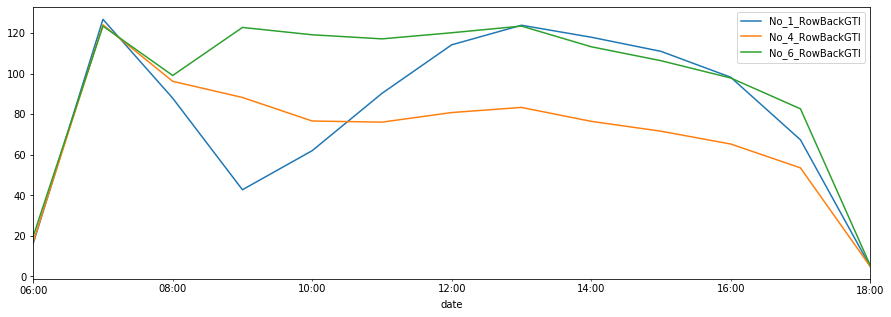

In [9]:
day = '5 Jul 2017'
res.loc[day, 'No_1_RowBackGTI'].plot(figsize=(15,5))
res.loc[day, 'No_4_RowBackGTI'].plot(figsize=(15,5))
res.loc[day, 'No_6_RowBackGTI'].plot(figsize=(15,5))
plt.legend()

# bifacialVF main

In [10]:
from bifacialvf import simulate
from bifacialvf.loadVFresults import loadVFresults

In [11]:
beta = 10                   # PV tilt (deg)
sazm = 180                  # PV Azimuth(deg) or tracker axis direction
C = 1                      # GroundClearance(panel slope lengths). For tracking this is tilt = 0 hub height 
D = 0.51519                 # DistanceBetweenRows(panel slope lengths)
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
cellRows = 6                # CellRows(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
albedo = 0.62               # ground albedo

In [12]:
# Tracking instructions
tracking=False
backtrack=True
rtr = 1.5                   # row to row spacing in normalized panel lengths. 

TMYtoread= "../bifacialvf/data/724010TYA.CSV"   # VA Richmond
writefiletitle="../bifacialvf/data/Output/TEST.csv"

In [13]:
simulate(TMYtoread, writefiletitle, beta, sazm, C, rtr= rtr, 
                rowType= rowType, transFactor= transFactor, cellRows= cellRows, 
                PVfrontSurface= PVfrontSurface, PVbackSurface= PVbackSurface,   
                albedo= albedo, tracking= tracking, backtrack= backtrack)

/home/tc256760/Apps/bifacialvf/bifacialvf/bifacialvf.py:43: pvlibDeprecationWarning: The readtmy3 function was deprecated in pvlib 0.6.1 and will be removed in 0.7. Use iotools.read_tmy3 instead.
  (TMY3, meta) = pvlib.tmy.readtmy3(TMYtoread)
  0%|          | 16/8760 [00:00<00:56, 155.54it/s]

 
********* 
Running Simulation for TMY3:  "RICHMOND INTERNATIONAL AP"
Location:   "RICHMOND INTERNATIONAL AP"
Lat:  37.517  Long:  -77.317  Tz  -5.0
Parameters: beta:  10   Sazm:  180   Height:  1   rtr separation:  1.5   Row type:  interior   Albedo:  0.62
Saving into ../bifacialvf/data/Output/TEST.csv
 
 


100%|██████████| 8760/8760 [00:32<00:00, 268.65it/s]

Finished


In [14]:
(data, metadata) = loadVFresults(writefiletitle)
#print data.keys()
# calculate average front and back global tilted irradiance across the module chord
data['GTIFrontavg'] = data[['No_1_RowFrontGTI', 'No_2_RowFrontGTI','No_3_RowFrontGTI','No_4_RowFrontGTI','No_5_RowFrontGTI','No_6_RowFrontGTI']].mean(axis=1)
data['GTIBackavg'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].mean(axis=1)

# Print the annual bifacial ratio.
frontIrrSum = data['GTIFrontavg'].sum()
backIrrSum = data['GTIBackavg'].sum()
print('The bifacial ratio for ground clearance {} and rtr spacing {} is: {:.1f}%'.format(C,rtr,backIrrSum/frontIrrSum*100))
#print("--- %s seconds ---" % (time.time() - start_time))

The bifacial ratio for ground clearance 1 and rtr spacing 1.5 is: 16.3%
